In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **1. Lecture des fichiers et création des DF**

In [8]:
clients = pd.read_csv("../Brief_ventes/Manel_analyse des ventes/clients.csv")
produits = pd.read_csv("../Brief_ventes/Manel_analyse des ventes/produits.csv")
ventes = pd.read_csv("../Brief_ventes/Manel_analyse des ventes/ventes.csv")


## 1.1 Préparation des données de la table "clients"

Utilisation des différentes fonctions pour avoir une idée des données de la table **client**

In [9]:

#clients.describe()
#clients.info()
#clients.isnull().sum()
#clients.shape
#clients.dtypes
clients.duplicated().sum()

np.int64(0)

Vérification des doublons

In [10]:
clients.duplicated().sum()

np.int64(0)

Afficher les valeurs uniques de la colonne **sex**

In [ ]:
clients["sex"].unique()

array(['f', 'm'], dtype=object)

En cas où un troisième genre apparaît, on peut supprimer la ligne contenant la valeur erronée

In [ ]:
#suppression de la ligne possédant la valeur "g" de la colonne "sex"
# cleanclients = clients[clients["sex"] != "g"]
# cleanclients["sex"].unique()

array(['f', 'm'], dtype=object)

Lister les **client_id** qui ne sont pas formatés correctement.

In [ ]:
#lister les valeurs qui ne sont pas formatés client-id (c_xxxx)
falseclients = clients[~clients["client_id"].str.match(r"^c_", na=False)]
print(falseclients)

     client_id sex  birth
2735      ct_0   f   2001
8494      ct_1   m   2001


Suppression des lignes dont le client_id est incorrect

In [ ]:
# drop les lignes ct_0 et ct_1
cleanclients = clients[~clients["client_id"].isin(["ct_0", "ct_1"])]

#replace z_4410 par c_4410 et 7839 par c_7839
#cleanclients["client_id"] = cleanclients["client_id"].replace("z_4410", "c_4410")

#cleanclients["client_id"] = cleanclients["client_id"].replace("7839", "c_7839")   ----ne marche pas
# cleanclients.iloc[1, 0] = "c_7839"
cleanclients.head(-10)


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8608,c_4082,m,2002
8609,c_8455,m,1972
8610,c_938,m,1967
8611,c_1293,m,1953


Préparation de la colonne **birth**

In [ ]:
#afficher les valeurs de début et de fin pour savoir si une date de naissance est une valeur aberrante.
clients.sort_values(by="birth")

#je choisis de supprimer les 3 lignes contenant des valeurs aberrantes (-1967,3,93)
# cleanclients = cleanclients[~cleanclients["birth"].isin([-1967, 3, 93])]
# cleanclients.sort_values(by="birth")


,client_id,sex,birth
2491,c_8362,f,1929
418,c_5302,m,1929
4569,c_577,m,1929
5138,c_7232,f,1930
1086,c_3218,f,1930
...,...,...,...
5706,c_119,f,2004
71,c_3081,m,2004
8598,c_5339,f,2004
8594,c_294,m,2004


Recherche de quantité de **birth** aberrante

In [ ]:
#recherche de quantité de birth aberrante
clients.birth.value_counts()

birth
2004    440
1979    215
1988    207
1986    203
1978    199
       ... 
1935      8
1932      6
1931      4
1930      4
1929      3
Name: count, Length: 76, dtype: int64

Je décide de garder la quantité de 2004 car cela peut corresponde à une vente de produit particulièrement ciblé à cette tranche d'âge.

Aperçu de la table **clients** nettoyée

In [ ]:
cleanclients.head(-10)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8608,c_4082,m,2002
8609,c_8455,m,1972
8610,c_938,m,1967
8611,c_1293,m,1953


## 1.2 **Préparation des données de la table produits**

Utilisation des différentes fonctions pour avoir une idée des données de la table **produits**

In [11]:
#produits.describe()
#produits.info()
#produits.isnull().sum()
#produits.shape
#produits.dtypes
produits.duplicated().sum()

np.int64(0)

On remarque les soucis suivants :
- Présence de valeur négative dans la colonne prix


Vérification des doublons dans la table **produits** et affichage des valeurs uniques dans la colonne **categ**

In [15]:
#vérifications des doublons:
print(produits.duplicated().sum())

#affichage des différents types de categ:
produits["categ"].unique()

0


array([0, 1, 2])

**Facultatif** : Colonne prix : nettoyage de données entrées en timestamp
Cas où le fichier source est une fichier excel et le formatage des cellules peut-être faussé et lors de l'import du fichier il se peut que Python lise des données au format timedate au lieu d'int ou float.

In [ ]:
#repérer les valeurs qui ne correspondent pas au format float (ici on convertit tout en numeric, si une erreur apparaît -> Nan et isna les liste)
# fauxprix = pd.to_numeric(produits["price"], errors="coerce").isna()
# listefaux = produits[fauxprix]

# listefaux["price"].astype("Float64")
# print(listefaux)
# produits["price"] = produits["price"].astype(str)
# produits['price'] = produits['price'].str.replace(r'[^\d\.\-]', '', regex=True)
# produits["price"] = pd.to_numeric(produits["price"], errors="coerce")
# produits = pd.read_excel("produits.xlsx", dtype={'price': str}, keep_default_na=False)

# def date_in_price_fix(df, column):
#     dates = pd.to_datetime(df[column], errors='coerce')

#     mask_dates = dates.notna()

#     df.loc[mask_dates, column] = dates.dt.strftime('%-d.%-m')

#     df[column] = df[column].astype(float)

# date_in_price_fix(produits, 'price')


Vérification des valeurs négatives dans la colonne **price**

In [16]:
produits[produits["price"]<=0]

,id_prod,price,categ
731,T_0,-1.0,0


Vérification du format des id-prod

In [17]:
#vérification du format des id_prod:
falseproduits = produits[~produits["id_prod"].str.match(r"^\d_\d+$", na=False)]
print(falseproduits)

    id_prod  price  categ
731     T_0   -1.0      0


Suppression de la ligne 731 (prix négatif + id_prod non formaté)

In [18]:
#suppression de la ligne contenant T_0
cleanproduits = produits[produits["id_prod"] != "T_0"]

#ce qui suit correspond à des erreurs id_prod autres que celle trouvée

#recherche d'un nom de produit égal à "1_587"
#cleanproduits[cleanproduits["id_prod"]=="1_587"]
#remplacer le 587 en 1_587
#cleanproduits["id_prod"] = cleanproduits["id_prod"].replace("587", "1_587")    ----- ne marche pas
#cleanproduits.iloc[3, 0] = "1_587"
# = cleanproduits[~cleanproduits["id_prod"].str.match(r"^\d_\d+$", na=False)]
#print(falseproduits)

Cas où des formats dates ont été trouvés dans la colonne **price**

In [ ]:
#supprimer les lignes contenant les format de temps dans la colonne price
#cleanproduits["price"] = pd.to_numeric(cleanproduits["price"], errors="coerce")
#cleanproduits.isnull().sum()
#cleanproduits.dropna(subset=["price"], inplace=True)


Aperçu de **produits** nettoyé

In [19]:
cleanproduits.head(-10)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3272,1_272,4.55,1
3273,0_1644,4.77,0
3274,0_1439,22.99,0
3275,0_1937,11.99,0


## 1.3 Préparation des données de la table **ventes**

Utilisation des différentes fonctions pour avoir une idée des données de la table **ventes**

In [12]:
#ventes.describe()
#ventes.info()
#ventes.isnull().sum()
#ventes.shape
#ventes.dtypes
ventes.duplicated().sum()

np.int64(126)

Eléments problématiques constatés:
- type de la date est en objet
- il y a 126 lignes en doublons

Vérification des formats des différentes colonnes

In [13]:
ventes.head(20)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478
6,0_1475,2022-06-03 04:45:09.871601,s_218033,c_7782
7,0_2110,2021-06-26 14:48:55.311418,s_54122,c_7456
8,0_1156,2022-12-27 12:27:40.641366,s_318058,c_7363
9,1_299,2021-11-29 15:54:25.880121,s_126880,c_1847


In [20]:
#vérification du format des id_prod:
falseventes = ventes[~ventes["id_prod"].str.match(r"^\d_\d+$", na=False)]
print(falseventes)

#suppression des lignes erronnées
cleanventes = ventes[ventes["id_prod"] != "T_0"]
cleanventes.head(26)

#vérification d'autres formats érronnés
falseventes = cleanventes[~cleanventes["id_prod"].str.match(r"^\d_\d+$", na=False)]
print(falseventes)

cleanventes.head(-10)

       id_prod                             date session_id client_id
3019       T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138       T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668       T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728      T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292      T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
...        ...                              ...        ...       ...
657830     T_0  test_2021-03-01 02:30:02.237417        s_0      ct_0
662081     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1
670680     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1
671647     T_0  test_2021-03-01 02:30:02.237424        s_0      ct_1
679180     T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1

[200 rows x 4 columns]
Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679517,1_107,2022-02-09 00:43:04.839774,s_162189,c_5213
679518,0_1548,2023-01-12 20:55:17.407880,s_325983,c_7047
679519,0_1470,2022-12-29 14:52:13.807220,s_319079,c_8210
679520,1_426,2021-06-10 23:55:16.962843,s_46917,c_3782


In [21]:
#Vérification du format de session_id
false = ventes[~ventes["session_id"].str.match(r"^s_\d+$", na=False)]
print(false)

Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []


In [22]:
#Vérification du format de client_id
false = cleanventes[~cleanventes["client_id"].str.match(r"^c_\d+$", na=False)]
print(false)

Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []


In [23]:
#Vérification du format de date
false = cleanventes[cleanventes["date"].str.match(r"^%Y-%m-%d %H:%M:%S.%f", na=False)]
print(false)


Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []


Vérification des formats effectués : pas d'autres anomalies à constater

Recherche des doublons suite à suppression des lignes erronnées

In [24]:
cleanventes.duplicated().sum()

np.int64(0)

Suite à la suppression des lignes test, il ne reste plus de doublons.

Changement du type de la colonne **date**. 
C'est possible une fois la colonne **date** nettoyée des valeurs qui ne correspondent pas à un format date.

In [25]:
#cleanventes["date"] = pd.to_datetime(cleanventes["date"])
cleanventes['date'] = pd.to_datetime(cleanventes['date'], errors='coerce')
# cleanventes["date"] = cleanventes["date"].astype("datetime64[ns]")
cleanventes.dtypes

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_7016\1444644054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanventes['date'] = pd.to_datetime(cleanventes['date'], errors='coerce')


id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

Aperçu de **ventes** nettoyé

In [26]:
cleanventes.head(-10)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679517,1_107,2022-02-09 00:43:04.839774,s_162189,c_5213
679518,0_1548,2023-01-12 20:55:17.407880,s_325983,c_7047
679519,0_1470,2022-12-29 14:52:13.807220,s_319079,c_8210
679520,1_426,2021-06-10 23:55:16.962843,s_46917,c_3782


**NOTES**

In [27]:
#BONUS
cleanventes[cleanventes["id_prod"]=="2_98"]

,id_prod,date,session_id,client_id
302441,2_98,2021-03-08 21:10:32.250919,s_3637,c_5967


## **1.4 Jointures des 3 DataFrame (Tables)**

### Jointure entre la table ventes et produits sur la base de id_prod. La jointure est externe pour conserver toutes les lignes de toutes les tables.

In [28]:
globadata = pd.merge(cleanventes, cleanproduits, on="id_prod", how="outer", indicator=True)   #indicator=True crée la colonne merge pour s'y référer
globadata.head(-20)


,id_prod,date,session_id,client_id,price,categ,_merge
0,0_0,2022-09-21 02:33:58.516037,s_271123,c_1609,3.75,0.0,both
1,0_0,2021-10-23 13:29:07.017762,s_108979,c_5438,3.75,0.0,both
2,0_0,2022-03-27 21:35:41.645375,s_185474,c_7204,3.75,0.0,both
3,0_0,2021-11-22 07:25:16.696280,s_123263,c_1609,3.75,0.0,both
4,0_0,2022-11-17 00:17:41.506523,s_298600,c_5674,3.75,0.0,both
...,...,...,...,...,...,...,...
679328,2_96,2021-10-17 11:01:10.228864,s_106088,c_4609,47.91,2.0,both
679329,2_96,2022-04-15 07:50:22.445231,s_194318,c_5800,47.91,2.0,both
679330,2_96,2021-03-31 15:46:51.859083,s_14053,c_5222,47.91,2.0,both
679331,2_96,2021-09-06 19:54:59.144384,s_86003,c_4463,47.91,2.0,both


On peut vérifier les autres types de jointures pour faire ressortir les produits non-vendus (right join) ou les produits non-référencés mais quand même vendus.

In [29]:
globadata[globadata._merge=="right_only"]

,id_prod,date,session_id,client_id,price,categ,_merge
6073,0_1014,NaT,NaN,NaN,1.15,0.0,right_only
6511,0_1016,NaT,NaN,NaN,35.06,0.0,right_only
8723,0_1025,NaT,NaN,NaN,24.99,0.0,right_only
21687,0_1062,NaT,NaN,NaN,20.08,0.0,right_only
40971,0_1119,NaT,NaN,NaN,2.99,0.0,right_only
94245,0_1318,NaT,NaN,NaN,20.92,0.0,right_only
297077,0_1620,NaT,NaN,NaN,0.80,0.0,right_only
299185,0_1624,NaT,NaN,NaN,24.50,0.0,right_only
311123,0_1645,NaT,NaN,NaN,2.99,0.0,right_only
323013,0_1780,NaT,NaN,NaN,1.67,0.0,right_only


Commentaire pour préciser la réponse de manière textuelle.

In [30]:
print("les produits qui ne sont pas vendus",globadata[globadata._merge=="right_only"].id_prod.unique())

les produits qui ne sont pas vendus ['0_1014' '0_1016' '0_1025' '0_1062' '0_1119' '0_1318' '0_1620' '0_1624'
 '0_1645' '0_1780' '0_1800' '0_2308' '0_299' '0_310' '0_322' '0_510' '1_0'
 '1_394' '2_72' '2_86' '2_87']


Suppression des produits invendus pour nettoyer le df d'informations inutiles

In [ ]:
#on supprime les produits invendus

index = globadata[globadata._merge=="right_only"].index

globadata.drop(index, inplace=True)

globadata[globadata._merge=="right_only"]

,id_prod,date,session_id,client_id,price,categ,_merge


On regarde maintenant les produits vendus non référencés dans la table **produits**

In [ ]:
#regardons les cas où le produit dans transaction n'est pas trouvé dans products
globadata[globadata._merge=="left_only"]

,id_prod,date,session_id,client_id,price,categ,_merge
380106,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,left_only
380107,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,left_only
380108,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,left_only
380109,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,left_only
380110,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,left_only
...,...,...,...,...,...,...,...
380322,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN,left_only
380323,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN,left_only
380324,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN,left_only
380325,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN,left_only


Un produit a été vendu 221 fois, mais on ne connait pas son prix.
Plusieurs possibilités : 

    - on supprime les lignes -> on sous-estimera le CA
    
    - on fait une imputation 

In [ ]:
# faisons une imputation 

# index = df_final[df_final._merge=="left_only"].index #on récupère l'index des lignes qu'il faut modifier 
# df_final.loc[index,"price"] = 11.7
# df_final.loc[index,"categ"] = 0

# Je sauvegarde les données concernant les lignes de commandes de produits non-référencés dans la table produits
produit0_2245 = globadata[globadata._merge=="left_only"]
produit0_2245.head(-10)

# Je supprime les lignes de ces produits dans globadata

index = globadata[globadata._merge=="left_only"].index

globadata.drop(index, inplace=True)

globadata[globadata._merge=="left_only"]

,id_prod,date,session_id,client_id,price,categ,_merge


### Jointure entre globadata et la table **clients**

Avant, il faut drop la colonne _merge pour pouvoir s'y référée une fois la jointure final effectuée.

In [ ]:
globadata.drop('_merge', axis=1, inplace=True)
globadata.head()

,id_prod,date,session_id,client_id,price,categ
0,0_0,2022-09-21 02:33:58.516037,s_271123,c_1609,3.75,0.0
1,0_0,2021-10-23 13:29:07.017762,s_108979,c_5438,3.75,0.0
2,0_0,2022-03-27 21:35:41.645375,s_185474,c_7204,3.75,0.0
3,0_0,2021-11-22 07:25:16.696280,s_123263,c_1609,3.75,0.0
4,0_0,2022-11-17 00:17:41.506523,s_298600,c_5674,3.75,0.0


Jointure de la table **clients** et **globadata**

In [ ]:
globadatafinal = pd.merge(globadata, cleanclients, on="client_id", how="outer", indicator=True)   #indicator=True crée la colonne merge pour s'y référer
globadatafinal.head(-20)

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge
0,0_1090,2021-12-19 02:44:12.827475,s_136532,c_1,13.78,0.0,m,1955,both
1,0_1186,2021-07-25 12:17:34.446678,s_66947,c_1,12.30,0.0,m,1955,both
2,0_1186,2022-08-25 12:17:34.446678,s_258252,c_1,12.30,0.0,m,1955,both
3,0_1378,2021-08-23 16:56:15.401655,s_79696,c_1,13.96,0.0,m,1955,both
4,0_1378,2022-07-23 16:56:15.401655,s_242617,c_1,13.96,0.0,m,1955,both
...,...,...,...,...,...,...,...,...,...
679107,1_251,2022-03-09 09:06:38.818975,s_176589,c_999,15.99,1.0,m,1964,both
679108,1_251,2022-08-09 09:06:38.818975,s_250655,c_999,15.99,1.0,m,1964,both
679109,1_251,2021-11-09 09:06:38.818975,s_116988,c_999,15.99,1.0,m,1964,both
679110,1_351,2022-05-21 17:16:06.807620,s_211960,c_999,28.99,1.0,m,1964,both


Vérification de globadata final

In [ ]:
#globadatafinal.describe()
globadatafinal.info()
#globadatafinal.isnull().sum()
#globadatafinal.shape
#globadatafinal.dtypes
#globadatafinal.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679132 entries, 0 to 679131
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679132 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  float64       
 6   sex         679132 non-null  object        
 7   birth       679132 non-null  int64         
 8   _merge      679132 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 42.1+ MB


Erreurs notées :
- 21 valeurs null sur plusieurs lignes

Vérifions s'il y a des ventes listant des clients non-référencés dans la table **clients**

In [ ]:
globadatafinal[globadatafinal._merge=="left_only"]

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge


Vérifions s'il y a des clients qui n'ont pas effectués d'achat

In [ ]:
globadatafinal[globadatafinal._merge=="right_only"]

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge
18122,NaN,NaT,NaN,c_1223,NaN,NaN,m,1963,right_only
165313,NaN,NaT,NaN,c_2706,NaN,NaN,f,1967,right_only
189295,NaN,NaT,NaN,c_3017,NaN,NaN,f,1992,right_only
223126,NaN,NaT,NaN,c_3443,NaN,NaN,m,1959,right_only
237310,NaN,NaT,NaN,c_3526,NaN,NaN,m,1956,right_only
257804,NaN,NaT,NaN,c_3789,NaN,NaN,f,1997,right_only
278767,NaN,NaT,NaN,c_4086,NaN,NaN,f,1992,right_only
302131,NaN,NaT,NaN,c_4358,NaN,NaN,m,1999,right_only
305297,NaN,NaT,NaN,c_4406,NaN,NaN,f,1998,right_only
308873,NaN,NaT,NaN,c_4447,NaN,NaN,m,1956,right_only


In [ ]:
# on stocke ces clients sur un df à part.
dormantclients = globadatafinal[globadatafinal._merge=="right_only"]

Suppression des clients qui n'ont pas achetés de produits

In [ ]:
#on supprime les clients radins/décédés/infidèles

index = globadatafinal[globadatafinal._merge=="right_only"].index

globadatafinal.drop(index, inplace=True)

globadatafinal[globadatafinal._merge=="right_only"]

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge


In [ ]:
globadatafinal.info()
globadatafinal.shape

<class 'pandas.core.frame.DataFrame'>
Index: 679111 entries, 0 to 679131
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  float64       
 6   sex         679111 non-null  object        
 7   birth       679111 non-null  int64         
 8   _merge      679111 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 47.3+ MB


(679111, 9)

# 2 Analyse globale du CA

In [ ]:
globadatafinal.head(-10)

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge
0,0_1090,2021-12-19 02:44:12.827475,s_136532,c_1,13.78,0.0,m,1955,both
1,0_1186,2021-07-25 12:17:34.446678,s_66947,c_1,12.30,0.0,m,1955,both
2,0_1186,2022-08-25 12:17:34.446678,s_258252,c_1,12.30,0.0,m,1955,both
3,0_1378,2021-08-23 16:56:15.401655,s_79696,c_1,13.96,0.0,m,1955,both
4,0_1378,2022-07-23 16:56:15.401655,s_242617,c_1,13.96,0.0,m,1955,both
...,...,...,...,...,...,...,...,...,...
679117,1_395,2022-07-23 16:44:27.072834,s_242616,c_999,28.99,1.0,m,1964,both
679118,1_395,2022-08-23 16:44:27.072834,s_257401,c_999,28.99,1.0,m,1964,both
679119,1_407,2021-11-13 15:31:15.583770,s_119092,c_999,15.99,1.0,m,1964,both
679120,1_407,2022-12-13 15:31:15.583770,s_311465,c_999,15.99,1.0,m,1964,both


Calcul du CA total

In [ ]:
globadatafinal["price"].sum().round(2)
print("Le CA total est égal à :", globadatafinal["price"].sum().round(2), "€.")

Le CA total est égal à : 11853728.68 €.


## 2.1 Traitement de la date

On aimerait pouvoir faire des analyses du CA par an, par mois, par jour de la semaine, par catégorie de produit.
On s'occupera des analyses des usages de clients dans le chapitre 3 

On a besoin de traiter la date pour pouvoir faire ces analyses. 
On va créer des nouvelles colonnes à parti de ce champ

In [ ]:
# Le type de **date** est déjà de time datetime
globadatafinal.dtypes
# changement du type de categ en int64 au lieu de float
globadatafinal["categ"] = globadatafinal["categ"].astype("Int64")
globadatafinal.dtypes

id_prod                 object
date            datetime64[ns]
session_id              object
client_id               object
price                  float64
categ                    Int64
sex                     object
birth                    int64
_merge                category
année                    int32
mois]                    int32
jour_mois                int32
jour_semaine             int32
dtype: object

Nous allons fragmenter la colonne date en année, mois, jour du mois, jour de la semaine.

In [ ]:
#Création de la colonne **année** à partir de la colonne **date**
globadatafinal["année"] = globadatafinal["date"].dt.year

#Création de la colonne **mois**
globadatafinal["mois]"] = globadatafinal["date"].dt.month

#Création de la colonne **jour_mois**
globadatafinal["jour_mois"] = globadatafinal["date"].dt.day

#Création de la colonne **jour_semaine"**
globadatafinal["jour_semaine"] = globadatafinal["date"].dt.weekday

globadatafinal.head(-10)

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge,année,mois],jour_mois,jour_semaine
0,0_1090,2021-12-19 02:44:12.827475,s_136532,c_1,13.78,0.0,m,1955,both,2021,12,19,6
1,0_1186,2021-07-25 12:17:34.446678,s_66947,c_1,12.30,0.0,m,1955,both,2021,7,25,6
2,0_1186,2022-08-25 12:17:34.446678,s_258252,c_1,12.30,0.0,m,1955,both,2022,8,25,3
3,0_1378,2021-08-23 16:56:15.401655,s_79696,c_1,13.96,0.0,m,1955,both,2021,8,23,0
4,0_1378,2022-07-23 16:56:15.401655,s_242617,c_1,13.96,0.0,m,1955,both,2022,7,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679117,1_395,2022-07-23 16:44:27.072834,s_242616,c_999,28.99,1.0,m,1964,both,2022,7,23,5
679118,1_395,2022-08-23 16:44:27.072834,s_257401,c_999,28.99,1.0,m,1964,both,2022,8,23,1
679119,1_407,2021-11-13 15:31:15.583770,s_119092,c_999,15.99,1.0,m,1964,both,2021,11,13,5
679120,1_407,2022-12-13 15:31:15.583770,s_311465,c_999,15.99,1.0,m,1964,both,2022,12,13,1


## 2.2 Analyse calendaire

In [ ]:
#Calcul du CA par année
globadatafinal.groupby("année").price.sum()

année
2021    4770826.56
2022    6108681.81
2023     974220.31
Name: price, dtype: float64

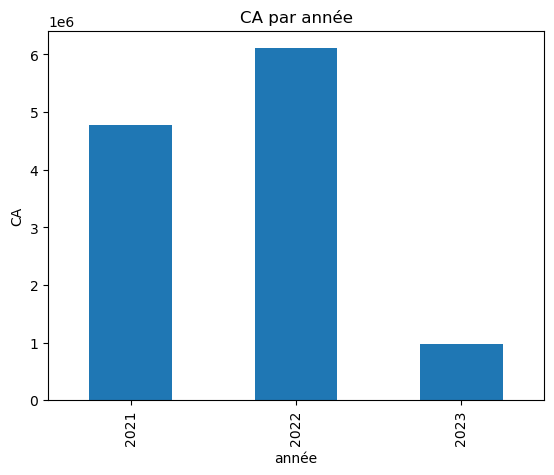

In [ ]:
# Création d'un graphique à barres pour montrer le CA par année
globadatafinal.groupby("année").price.sum().plot(kind = "bar", title="CA par année",ylabel="CA")
plt.show()

En vous inspirant de ce qu'on vient de faire :

- Etudier le CA par mois. Qu'observons nous ? 

- Est-ce qu'il y a un effet fin de mois ? ou début de mois ?

- Est-ce qu'il y a un effet WE? 

In [ ]:
# Calcul du CA par mois
globadatafinal.groupby("mois]").price.sum().sort_values

<bound method Series.sort_values of mois]
1     1042879.54
2      992251.26
3      997897.14
4      969108.24
5     1010076.07
6      980104.68
7      993618.52
8      988752.06
9     1001355.21
10     828716.51
11    1012832.67
12    1036136.78
Name: price, dtype: float64>

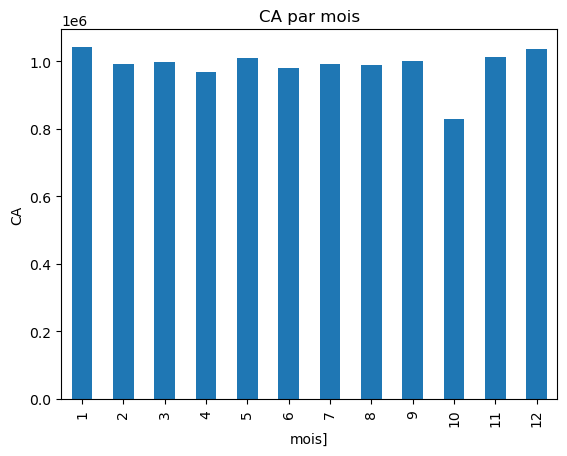

In [ ]:
#graph à barres
globadatafinal.groupby("mois]").price.sum().plot(kind = "bar", title="CA par mois",ylabel="CA")
plt.show()

Vive noël, la rentrée et mai (pourquoi mai???)

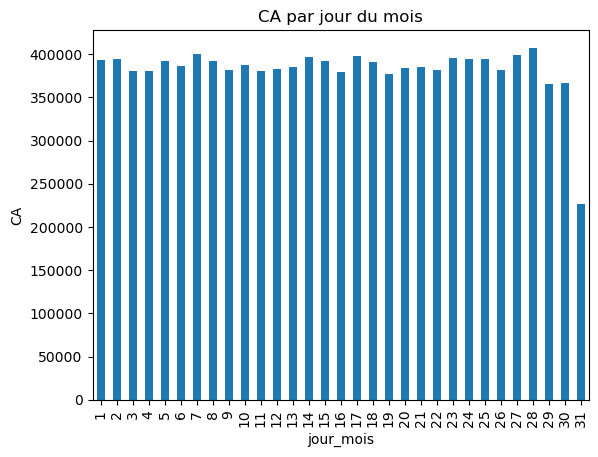

In [ ]:
#calcul du CA par jour du mois
globadatafinal.groupby("jour_mois").price.sum().sort_values

#graph
globadatafinal.groupby("jour_mois").price.sum().plot(kind = "bar", title="CA par jour du mois",ylabel="CA")
plt.show()

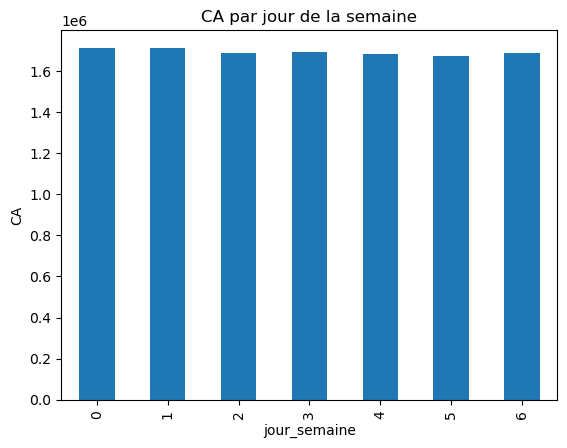

In [ ]:
#calcul du CA par jour de la semaine
globadatafinal.groupby("jour_semaine").price.sum().sort_values

#graph
globadatafinal.groupby("jour_semaine").price.sum().plot(kind = "bar", title="CA par jour de la semaine",ylabel="CA")
plt.show()

graph à adapter en courbe avec zoom

## 2.3 Analyse par catégorie



Analyse du Ca par catégorie

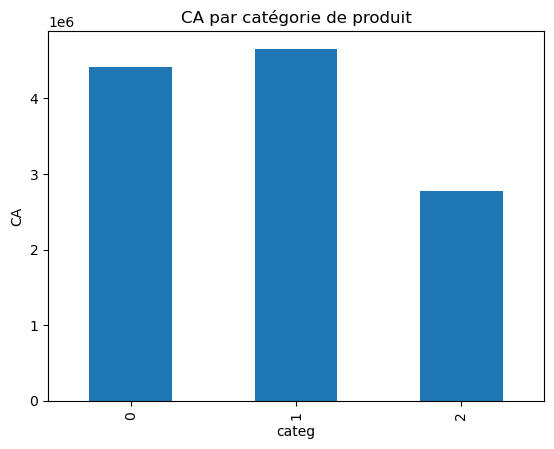

In [ ]:
#Calcul du CA total par catégorie
globadatafinal.groupby("categ").price.sum()

# Création d'un graphique à bar pour représenter le CA par catégorie
globadatafinal.groupby("categ").price.sum().plot(kind = "bar", title="CA par catégorie de produit",ylabel="CA")
plt.show()

# 3 Analyse des usages des clients

## 3.1 Traitement de l'âge 

Cherchons les corrélations entre l'âge des clients et leurs usages d'achat.

In [ ]:
#Création d'une colonne age
globadatafinal["age"] = 2023 - globadatafinal["birth"]
globadatafinal.head(-10)

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge,année,mois],jour_mois,jour_semaine,age,Age_tranche
0,0_1090,2021-12-19 02:44:12.827475,s_136532,c_1,13.78,0,m,1955,both,2021,12,19,6,68,66-70
1,0_1186,2021-07-25 12:17:34.446678,s_66947,c_1,12.30,0,m,1955,both,2021,7,25,6,68,66-70
2,0_1186,2022-08-25 12:17:34.446678,s_258252,c_1,12.30,0,m,1955,both,2022,8,25,3,68,66-70
3,0_1378,2021-08-23 16:56:15.401655,s_79696,c_1,13.96,0,m,1955,both,2021,8,23,0,68,66-70
4,0_1378,2022-07-23 16:56:15.401655,s_242617,c_1,13.96,0,m,1955,both,2022,7,23,5,68,66-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679117,1_395,2022-07-23 16:44:27.072834,s_242616,c_999,28.99,1,m,1964,both,2022,7,23,5,59,56-60
679118,1_395,2022-08-23 16:44:27.072834,s_257401,c_999,28.99,1,m,1964,both,2022,8,23,1,59,56-60
679119,1_407,2021-11-13 15:31:15.583770,s_119092,c_999,15.99,1,m,1964,both,2021,11,13,5,59,56-60
679120,1_407,2022-12-13 15:31:15.583770,s_311465,c_999,15.99,1,m,1964,both,2022,12,13,1,59,56-60


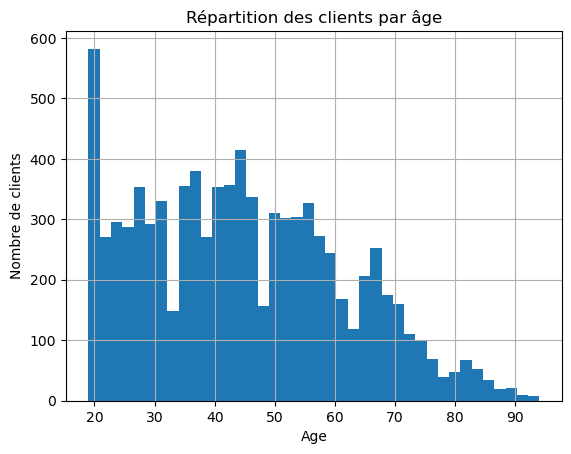

In [ ]:
#Graphique montrant la répartition de la clientèle par age
globadatafinal.groupby("client_id")["age"].mean().hist(bins=40)
plt.title("Répartition des clients par âge")
plt.xlabel("Age")
plt.ylabel("Nombre de clients")
plt.show()

On remarque une forte représentation des clients d'environ 20 ans.  
Afin de tirer une analyse plus fine, nous allons diviser l'âge des clients en catégories.

In [ ]:
# Pour créer des intervalles, on utilise labels
labels = ["19-25", "26-30", "31-35", "36-40", "41-45", "46-50","51-55","56-60","61-65", "66-70", "71-75", "76-80", "81-85", "86-90", "91 et+"]
# question : comment faire pour que cela corresponde à l'age réel du client ? là c'est juste une divirion de catégorie en x sous-catégorie
globadatafinal['Age_tranche']= pd.cut(globadatafinal['age'], 15,labels=labels)
globadatafinal.head(-10)

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge,année,mois],jour_mois,jour_semaine,age,Age_tranche
0,0_1090,2021-12-19 02:44:12.827475,s_136532,c_1,13.78,0,m,1955,both,2021,12,19,6,68,66-70
1,0_1186,2021-07-25 12:17:34.446678,s_66947,c_1,12.30,0,m,1955,both,2021,7,25,6,68,66-70
2,0_1186,2022-08-25 12:17:34.446678,s_258252,c_1,12.30,0,m,1955,both,2022,8,25,3,68,66-70
3,0_1378,2021-08-23 16:56:15.401655,s_79696,c_1,13.96,0,m,1955,both,2021,8,23,0,68,66-70
4,0_1378,2022-07-23 16:56:15.401655,s_242617,c_1,13.96,0,m,1955,both,2022,7,23,5,68,66-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679117,1_395,2022-07-23 16:44:27.072834,s_242616,c_999,28.99,1,m,1964,both,2022,7,23,5,59,56-60
679118,1_395,2022-08-23 16:44:27.072834,s_257401,c_999,28.99,1,m,1964,both,2022,8,23,1,59,56-60
679119,1_407,2021-11-13 15:31:15.583770,s_119092,c_999,15.99,1,m,1964,both,2021,11,13,5,59,56-60
679120,1_407,2022-12-13 15:31:15.583770,s_311465,c_999,15.99,1,m,1964,both,2022,12,13,1,59,56-60


## 3.2 Analyse du chiffre d'affaires par client

In [ ]:
#calcul du nombre de client unique
globadatafinal.client_id.nunique()
print("le nombre de client unique est de :", globadatafinal.client_id.nunique())

le nombre de client unique est de : 8600


In [ ]:
#Montant des achats par client
uniclient = globadatafinal.groupby("client_id").price.sum().sort_values(ascending=False).reset_index()
uniclient.rename(columns={"price": "CA_client"}, inplace=True)
uniclient.head(-10)
uniclient.dtypes

client_id     object
CA_client    float64
dtype: object

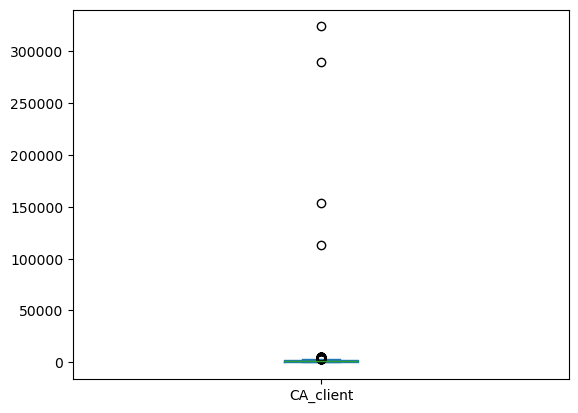

In [ ]:
# Détection de valeurs aberrantes dans le CA par client par plot.box
uniclient["CA_client"].plot.box()
plt.show()

In [ ]:
#liste des valeurs abérrantes
# Détection et affichage des valeurs aberrantes dans le CA par client
Q1 = uniclient["CA_client"].quantile(0.25)
Q3 = uniclient["CA_client"].quantile(0.75)
IQR = Q3 - Q1

outliers = uniclient[(uniclient["CA_client"] < Q1 - 1.5 * IQR) | (uniclient["CA_client"] > Q3 + 1.5 * IQR)]
print(outliers)

    client_id  CA_client
0      c_1609  324033.35
1      c_4958  289760.34
2      c_6714  153598.92
3      c_3454  113637.93
4      c_3263    5276.87
..        ...        ...
241    c_4101    3638.13
242    c_4557    3636.35
243    c_6182    3634.58
244     c_383    3632.18
245    c_7779    3631.94

[246 rows x 2 columns]


In [ ]:
#Part du CA par les Outliers:
CA_total = globadatafinal["price"].sum().round(2)
CA_outliers = outliers["CA_client"].sum().round(2)
part_CA_outliers = ((CA_outliers*100)/CA_total).round(2)

# ou part_CA_outliers = (outliers["CA_client"].sum() * 100 / globadatafinal["price"].sum()).round(2)

print(part_CA_outliers)

15.9


La part des outliers représente près de 16% du CA final. Comment utiliser 